In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/yasserjaghoori/Desktop/Grad School Classes/Fall 2024/AIT 580_Fall 2024/Data Sets/Motor_Vehicle_Collisions_-_Crashes_20241011.csv')

/var/folders/qn/vlc6mp4j1zg3b362vjwz40s80000gn/T/ipykernel_86429/2479766488.py:4: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [13]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')  # Convert to datetime
df['HOUR'] = df['CRASH TIME'].dt.hour  # Extract hour
df = df.dropna(subset=['BOROUGH', 'HOUR'])
hourly_accidents = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='Accident_Count')
heatmap_data = hourly_accidents.pivot(index='HOUR', columns='BOROUGH', values='Accident_Count')

/var/folders/qn/vlc6mp4j1zg3b362vjwz40s80000gn/T/ipykernel_86429/287747326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')  # Convert to datetime
/var/folders/qn/vlc6mp4j1zg3b362vjwz40s80000gn/T/ipykernel_86429/287747326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = df['CRASH TIME'].dt.hour  # Extract hour


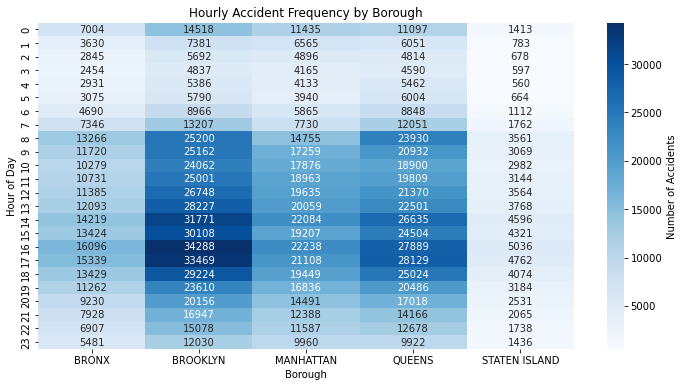

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Accidents'})
plt.title('Hourly Accident Frequency by Borough')
plt.xlabel('Borough')
plt.ylabel('Hour of Day')
plt.show()

In [17]:
correlation_results = {}
for borough in df['BOROUGH'].unique():
    borough_data = df[df['BOROUGH'] == borough]
    hour_counts = borough_data.groupby('HOUR').size()
    correlation = hour_counts.corr(pd.Series(hour_counts.index))
    correlation_results[borough] = correlation
print("Correlation between time of day and accident frequency by borough:")
for borough, corr in correlation_results.items():
    print(f"{borough}: {corr:.2f}")

Correlation between time of day and accident frequency by borough:
BROOKLYN: 0.53
BRONX: 0.51
MANHATTAN: 0.55
QUEENS: 0.53
STATEN ISLAND: 0.52


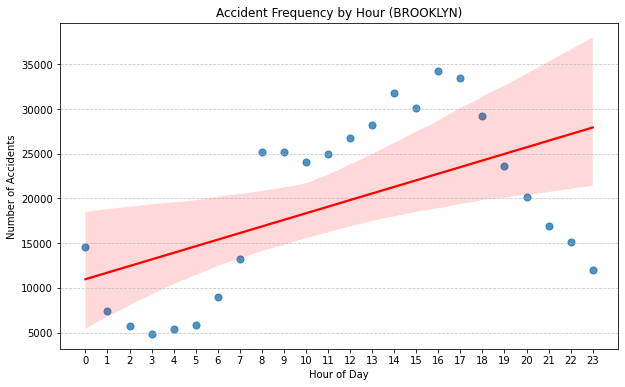

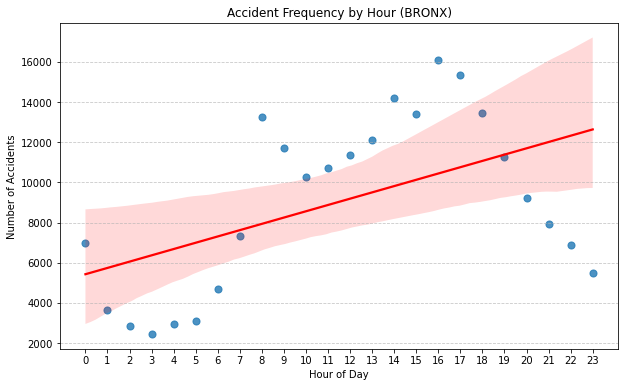

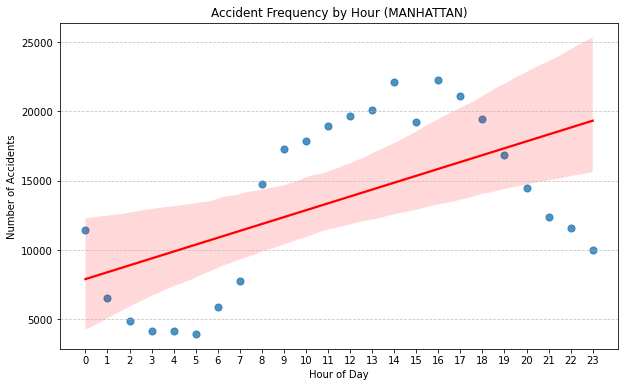

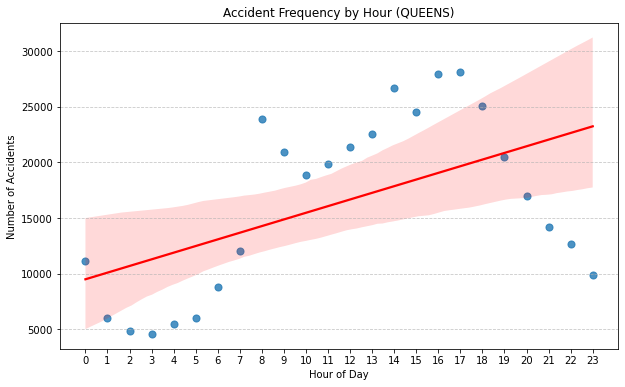

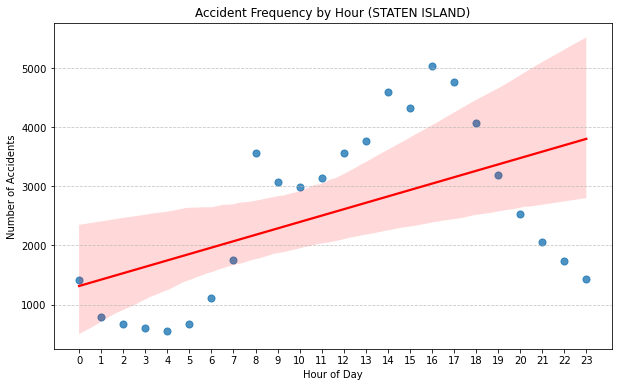

In [24]:
# Group data by borough and hour
hourly_accidents = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='Accident_Count')

# Loop through boroughs to plot
boroughs = df['BOROUGH'].unique()
for borough in boroughs:
    borough_data = hourly_accidents[hourly_accidents['BOROUGH'] == borough]
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='HOUR', y='Accident_Count', data=borough_data, scatter_kws={'s': 50}, line_kws={"color": "red"})
    plt.title(f'Accident Frequency by Hour ({borough})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

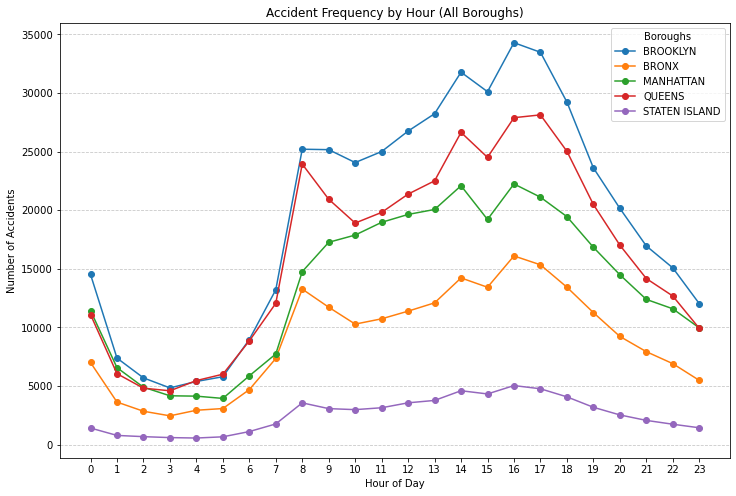

In [26]:
# Group data by hour and borough
hourly_accidents = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='Accident_Count')

# Create line plots for all boroughs
plt.figure(figsize=(12, 8))
boroughs = df['BOROUGH'].dropna().unique()  # Get unique borough names

for borough in boroughs:
    borough_data = hourly_accidents[hourly_accidents['BOROUGH'] == borough]
    plt.plot(borough_data['HOUR'], borough_data['Accident_Count'], marker='o', label=borough)

plt.title('Accident Frequency by Hour (All Boroughs)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))  # Set x-axis to show all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Boroughs')
plt.show()

In [29]:
df['BOROUGH'] = df['BOROUGH'].fillna('UNKNOWN')  # Handle missing boroughs
data_encoded = pd.get_dummies(df, columns=['BOROUGH'], drop_first=True)


In [30]:
import statsmodels.api as sm

# Train Poisson regression
X = hourly_accidents[['HOUR']]
X = sm.add_constant(X)  # Add intercept
y = hourly_accidents['Accident_Count']

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Accident_Count   No. Observations:                  120
Model:                            GLM   Df Residuals:                      118
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4799e+05
Date:                Tue, 03 Dec 2024   Deviance:                   6.9467e+05
Time:                        13:19:39   Pearson chi2:                 6.67e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9458      0.002   4928.723      0.0

In [36]:
df['TOTAL_INJURIES'] = (
    df['NUMBER OF PERSONS INJURED'].fillna(0) +
    df['NUMBER OF PEDESTRIANS INJURED'].fillna(0) +
    df['NUMBER OF CYCLIST INJURED'].fillna(0) +
    df['NUMBER OF MOTORIST INJURED'].fillna(0)
)
injury_data = df[df['TOTAL_INJURIES'] > 0]

In [39]:
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 
                   'VEHICLE TYPE CODE 5']
vehicle_data = injury_data.melt(id_vars=['BOROUGH'], 
                                value_vars=vehicle_columns, 
                                var_name='Vehicle_Column', 
                                value_name='Vehicle_Type')

In [41]:
vehicle_data = vehicle_data.dropna(subset=['Vehicle_Type'])
vehicle_summary = vehicle_data.groupby(['BOROUGH', 'Vehicle_Type']).size().reset_index(name='Accident_Count')
vehicle_summary = vehicle_summary.sort_values(by='Accident_Count', ascending=False)


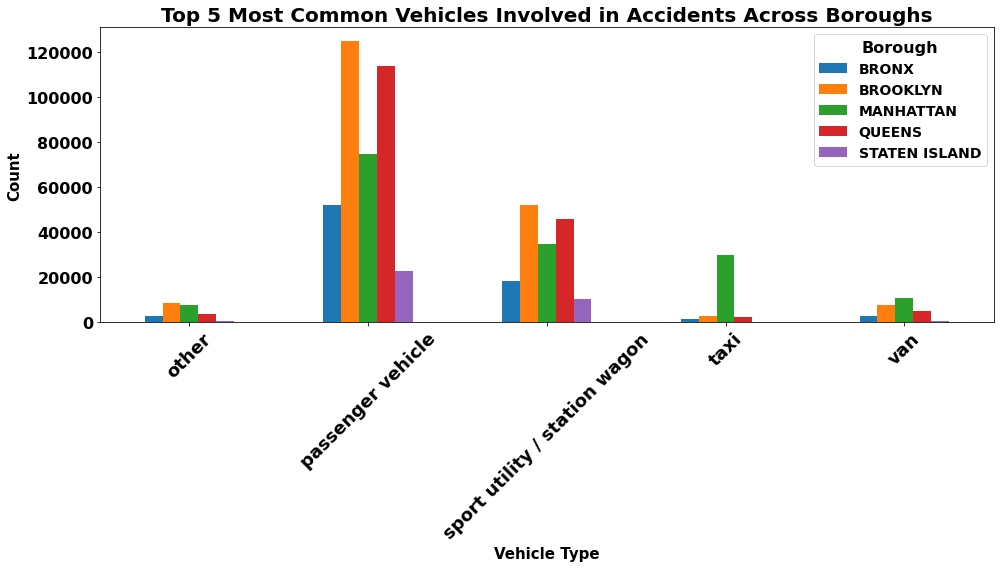

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
# Columns for vehicle types
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Standardize vehicle types
for col in vehicle_columns:
    df[col] = df[col].str.lower()  # Convert to lowercase
    df[col] = df[col].replace({'bicycle': 'bike', 'taxi': 'taxi', 'unknown': None})  # Standardize and remove 'unknown'

# Remove rows with 'UNKNOWN' boroughs or null boroughs
df = df[~df['BOROUGH'].str.lower().isin(['unknown'])]

# Combine all vehicle columns into one column for analysis
df['all_vehicles'] = df[vehicle_columns].apply(lambda row: row.dropna().tolist(), axis=1)
df_exploded = df.explode('all_vehicles')  # Create a new row for each vehicle type

# Drop rows with NaN vehicle types
df_exploded = df_exploded.dropna(subset=['all_vehicles'])

# Count occurrences of vehicle types by borough
vehicle_counts = df_exploded.groupby(['BOROUGH', 'all_vehicles']).size().reset_index(name='count')

# Find the 10 most common vehicles across all boroughs
top_vehicles = (
    vehicle_counts.groupby('all_vehicles')['count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data to include only the top vehicles
filtered_data = vehicle_counts[vehicle_counts['all_vehicles'].isin(top_vehicles)]

# Pivot for plotting
pivot_data = filtered_data.pivot(index='all_vehicles', columns='BOROUGH', values='count').fillna(0)

pivot_data.plot(kind='bar', figsize=(14, 8))
plt.title('Top 5 Most Common Vehicles Involved in Accidents Across Boroughs', fontsize=20, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.legend(title='Borough',prop={'size': 14, 'weight': 'bold'}, title_fontproperties={'size': 16, 'weight': 'bold'})

# Customize x-axis labels
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=16, fontweight ='bold')
plt.tight_layout()
plt.show()


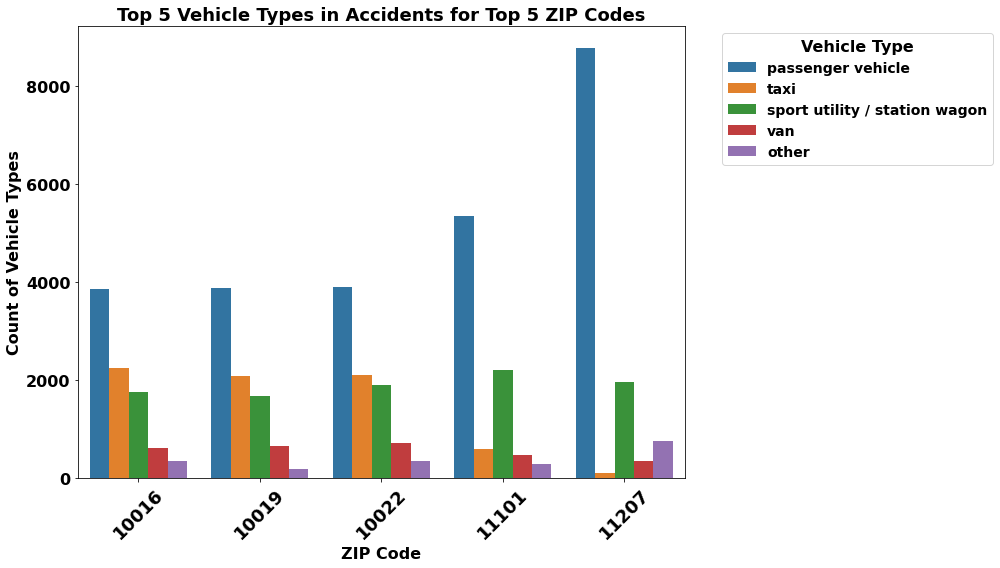

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Identify the top 5 ZIP codes with the most accidents
top_zipcodes = (
    df.groupby('ZIP CODE').size()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for the top 5 ZIP codes
top_zipcode_data = df_exploded[df_exploded['ZIP CODE'].isin(top_zipcodes)]

# Group and count vehicle types for each ZIP code
vehicle_by_zipcode = (
    top_zipcode_data.groupby(['ZIP CODE', 'all_vehicles'])
    .size()
    .reset_index(name='count')
    .sort_values(['ZIP CODE', 'count'], ascending=[True, False])
)

# Identify the top 5 vehicle types across all ZIP codes
top_vehicles = (
    vehicle_by_zipcode.groupby('all_vehicles')['count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for only the top 5 vehicle types
filtered_data = vehicle_by_zipcode[vehicle_by_zipcode['all_vehicles'].isin(top_vehicles)]

# Create a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_data, x='ZIP CODE', y='count', hue='all_vehicles')

# Customize the chart
plt.title('Top 5 Vehicle Types in Accidents for Top 5 ZIP Codes', fontsize=18, fontweight = 'bold')
plt.xlabel('ZIP Code', fontsize=16, fontweight ='bold')
plt.ylabel('Count of Vehicle Types', fontsize=16, fontweight = 'bold')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14, 'weight': 'bold'}, title_fontproperties={'size': 16, 'weight': 'bold'})
plt.xticks(rotation=45)
plt.tight_layout()

plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=16, fontweight ='bold')
plt.tight_layout()
plt.show()

# Display the chart
plt.show()
